In [1]:
using QuantumOptics
using PyPlot

In [3]:
# System Parameters
m = 1.
ω = 0.5 # Strength of trapping potential

0.5

In [4]:
# Position Basis
xmin = -5
xmax = 5
Npoints = 100
b_position = PositionBasis(xmin, xmax, Npoints)
xdisp = 0.1*one(b_position)

# Hamiltonian in real space basis
p = momentum(b_position) # Dense operator
x = position(b_position) # Sparse operator

H = p^2/2m + 1/2*m*ω^2*dense(x^2);

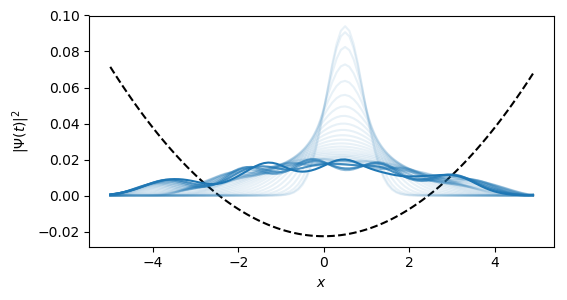

In [5]:
# Initial state
x0 = 0.5
p0 = 0
sigma0 = 0.6
Ψ0 = gaussianstate(b_position, x0, p0, sigma0);

# Time evolution
T = [0:0.1:3;]
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H);

# Plot dynamics of particle density
x_points = samplepoints(b_position)

n = abs.(Ψ0.data).^2
V = ω*x_points.^2
C = maximum(V)/maximum(n)

figure(figsize=(6,3))
xlabel(L"x")
ylabel(L"| \Psi(t) |^2")
plot(x_points, (V.-3)./C, "k--")

for i=1:length(T)
    Ψ = Ψt[i]
    n .= abs.(Ψ.data).^2
    plot(x_points, n, "C0", alpha=0.9*(float(i)/length(T))^8+0.1)
end